In [77]:
!pip install --upgrade scikit-learn



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Multi_labeled_toxic_comments.csv')
print(df.head())

                                                text  vulgar  hate  religious  \
0  প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার...       0     0          0   
1                                   আমি বললাম, ‘দেন’       0     0          0   
2  অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার ...       0     0          0   
3                                  তার উপর ২ জন মেয়র       0     0          0   
4  পলাশের কাজ এতো ভালো হবে কল্পনাও করি নাই তৌহিদে...       0     0          0   

   threat  troll  Insult  
0       1      0       0  
1       0      0       0  
2       0      0       0  
3       0      0       0  
4       0      0       0  


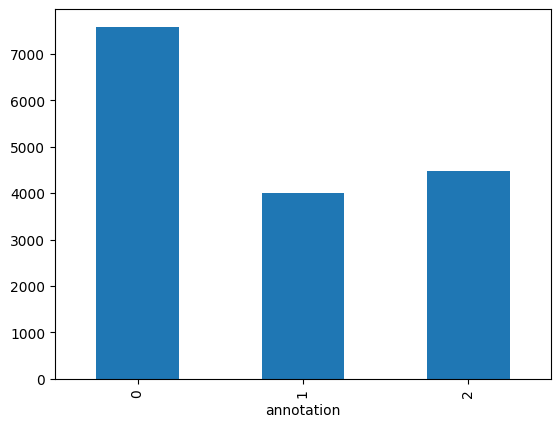

In [3]:
def check_for_1(row):
    if row['threat'] == 1 or row['hate'] == 1 or row['religious'] == 1:
        return 2
    elif row['vulgar'] == 1 or row['troll'] == 1 or row['Insult'] == 1:
        return 1
    else:
        return 0

# Apply the function to each row to create the new 'yes/no' field
df['annotation'] = df.apply(check_for_1, axis=1)

df.head
df['annotation'].value_counts().sort_index().plot.bar()
df.drop(['hate'],axis = 1,inplace = True)
df.drop(['religious'],axis = 1,inplace = True)
df.drop(['troll'],axis = 1,inplace = True)
df.drop(['Insult'],axis = 1,inplace = True)
df.drop(['vulgar'], axis=1, inplace = True)
df.drop(['threat'], axis=1, inplace = True)




In [4]:
print(df.head())

                                                text  annotation
0  প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার...           2
1                                   আমি বললাম, ‘দেন’           0
2  অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার ...           0
3                                  তার উপর ২ জন মেয়র           0
4  পলাশের কাজ এতো ভালো হবে কল্পনাও করি নাই তৌহিদে...           0


In [130]:
!pip install nlpaug


<Axes: ylabel='count'>

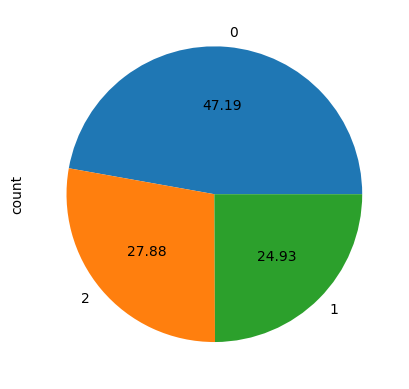

In [5]:
df['annotation'].value_counts().plot(kind='pie' ,autopct='%.2f')

In [6]:
df.isnull().mean()*100

text          0.0
annotation    0.0
dtype: float64

In [7]:
print("PosiNon cyber trollingtive: ", df.annotation.value_counts()[0]/len(df.annotation)*100,"%")
print("Cybertrolling: ", df.annotation.value_counts()[1]/len(df.annotation)*100,"%")
print("Crime: ", df.annotation.value_counts()[2]/len(df.annotation)*100,"%")

PosiNon cyber trollingtive:  47.19094133018105 %
Cybertrolling:  24.930006843775278 %
Crime:  27.87905182604368 %


In [8]:
print("Shape of the DataFrame:", df.shape)

# To view the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

Shape of the DataFrame: (16073, 2)
First 5 rows of the DataFrame:
                                                text  annotation
0  প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার...           2
1                                   আমি বললাম, ‘দেন’           0
2  অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার ...           0
3                                  তার উপর ২ জন মেয়র           0
4  পলাশের কাজ এতো ভালো হবে কল্পনাও করি নাই তৌহিদে...           0


In [9]:
!pip install bnlp


In [10]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import string

# Download necessary NLTK resources
nltk.download('stopwords')

# Assuming 'bengali' is a valid NLTK corpus (replace 'bengali' with 'indian' if needed as NLTK may not have specific Bengali support)
stop = set(stopwords.words('bengali'))

def remove_stopwords_and_punctuation(text):
    # Ensure text is a string
    text = str(text)
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text_without_punctuation = re.sub(r'[{}]+'.format(re.escape(string.punctuation)), '', text)
    # Remove stopwords
    text_without_stopwords = ' '.join([word for word in text_without_punctuation.split() if word not in stop])
    return text_without_stopwords

# Example DataFrame loading (adjust the file path)
# df = pd.read_csv('your_dataset.csv')

# Apply the function to the 'text' column and create a new column
df['content_without_stopwords'] = df['text'].apply(remove_stopwords_and_punctuation)

# Print the first few rows of the DataFrame to check results
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  annotation  \
0  প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার...           2   
1                                   আমি বললাম, ‘দেন’           0   
2  অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার ...           0   
3                                  তার উপর ২ জন মেয়র           0   
4  পলাশের কাজ এতো ভালো হবে কল্পনাও করি নাই তৌহিদে...           0   

                           content_without_stopwords  
0  প্রধানমন্ত্রী হক সাহেবের ক্ষতি জাতির স্বার্থে ...  
1                                        বললাম ‘দেন’  
2           অসাধারণ তানজিন তিশা বালো লাগার একজনকাতার  
3                                             ২ মেয়র  
4    পলাশের এতো ভালো কল্পনাও তৌহিদের ফ্রেন্ড সাদ্দাম  


In [11]:
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')

# Initialize Porter Stemmer
porter_stemmer = PorterStemmer()

def stem_tokens(text):
    # Tokenize the text
    nltk_tokens = word_tokenize(text)
    stemmed_tokens = []
    for w in nltk_tokens:
        # Remove digits
        w = re.sub(r'\d+', '', w)
        # Stem the word and add to list
        stemmed_tokens.append(porter_stemmer.stem(w))
    # Return the joined string
    return ' '.join(stemmed_tokens)

# Apply stemming and remove digits to each row
df['content_tokenize'] = df['content_without_stopwords'].apply(stem_tokens)

# Optionally, delete the 'content_without_stopwords' column
if 'content_without_stopwords' in df:
    df.drop(columns=['content_without_stopwords'], inplace=True)

# Print the first few rows to check results
print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                text  annotation  \
0  প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার...           2   
1                                   আমি বললাম, ‘দেন’           0   
2  অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার ...           0   
3                                  তার উপর ২ জন মেয়র           0   
4  পলাশের কাজ এতো ভালো হবে কল্পনাও করি নাই তৌহিদে...           0   

                                    content_tokenize  
0  প্রধানমন্ত্রী হক সাহেবের ক্ষতি জাতির স্বার্থে ...  
1                                      বললাম ‘ দেন ’  
2           অসাধারণ তানজিন তিশা বালো লাগার একজনকাতার  
3                                               মেয়র  
4    পলাশের এতো ভালো কল্পনাও তৌহিদের ফ্রেন্ড সাদ্দাম  


In [12]:
tfIdfVectorizer = TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.content_tokenize.tolist())


In [13]:
print(tfIdf.shape) # means total rows  20001 with 14783 features

(16073, 4248)


In [14]:
X = df['content_tokenize']
y = df['annotation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
vectorizer = TfidfVectorizer(use_idf=True, sublinear_tf=True)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
x_val=vectorizer.transform(X)




In [16]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [18]:
print(f"accuracy : {accuracy1}")

accuracy : 0.6846034214618973


In [19]:
#print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[1185  164  120]
 [ 220  462  181]
 [ 155  174  554]]


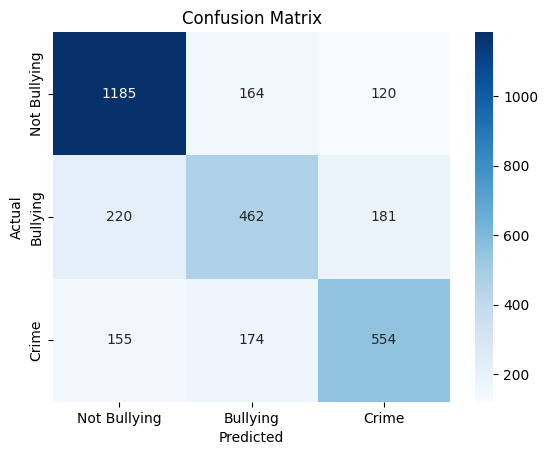

In [20]:
# Define your custom labels
labels = ['Not Bullying', 'Bullying', 'Crime']

# Generate your confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap with custom labels
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)


# Calculate precision
precision = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[1, 0] + conf_matrix[2, 0])
# Calculate recall
recall = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1] + conf_matrix[0, 2])
# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)
print("Accuracy:", accuracy)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

Accuracy: 0.6846034214618973
Precision: 0.7596153846153846
Recall: 0.8066712049012934
F1 Score: 0.7824364476724991


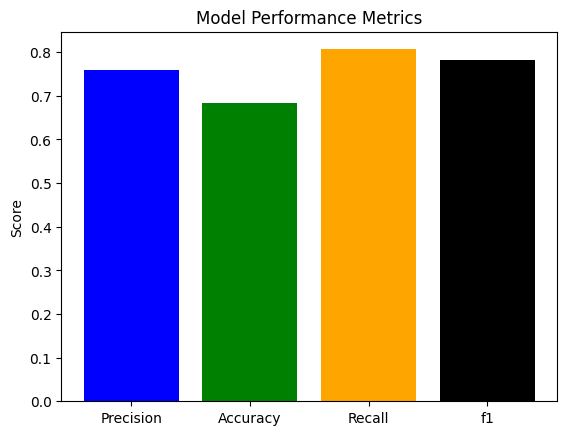

In [22]:
labels = ['Precision', 'Accuracy', 'Recall','f1']
values = [precision, accuracy, recall,f1_score]

plt.bar(labels, values, color=['blue', 'green', 'orange','black'])
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.show()

In [23]:
cross_val_scores = cross_val_score(model, x_val, y, cv=10)
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [0.68159204 0.69216418 0.70273632 0.69197262 0.69570629 0.69570629
 0.68512757 0.69446173 0.6925949  0.69570629]
Mean cross-validation score: 0.6927768206261784


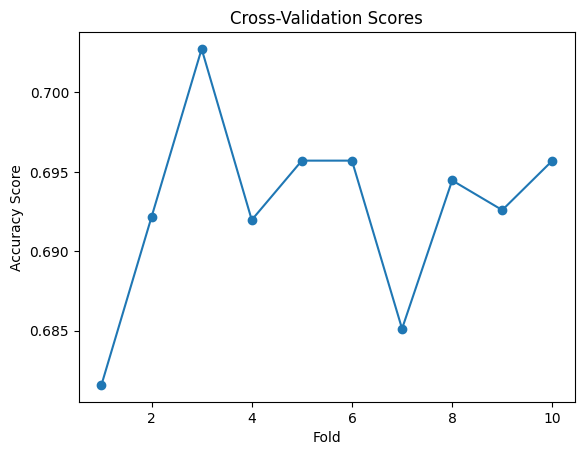

In [24]:
plt.plot(range(1, 11), cross_val_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores')
plt.show()

In [25]:
model1 = DecisionTreeClassifier(criterion='entropy')  # ID3 algorithm uses entropy
model1.fit(X_train_vectorized, y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:

# Predictions on the test set
y_pred = model1.predict(X_test_vectorized)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Accuracy:", accuracy2)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6164852255054433
Confusion Matrix:
 [[1057  238  174]
 [ 246  426  191]
 [ 171  213  499]]


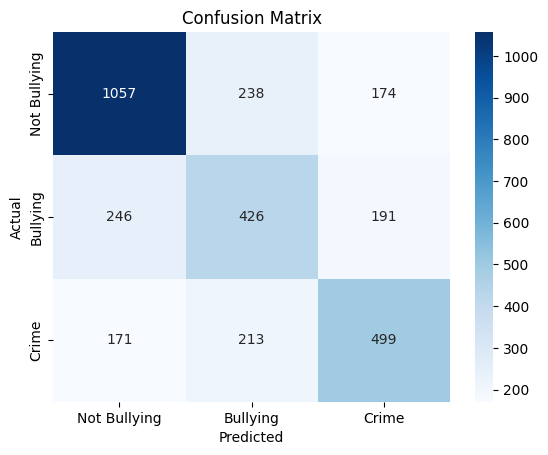

In [27]:
# Define your custom labels
labels = ['Not Bullying', 'Bullying', 'Crime']

# Generate your confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap with custom labels
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[1, 0] + conf_matrix[2, 0])
# Calculate recall
recall = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1] + conf_matrix[0, 2])
# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)
print("Accuracy:", accuracy)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

Accuracy: 0.6164852255054433
Precision: 0.7170963364993216
Recall: 0.7195371000680735
F1 Score: 0.7183146449201494


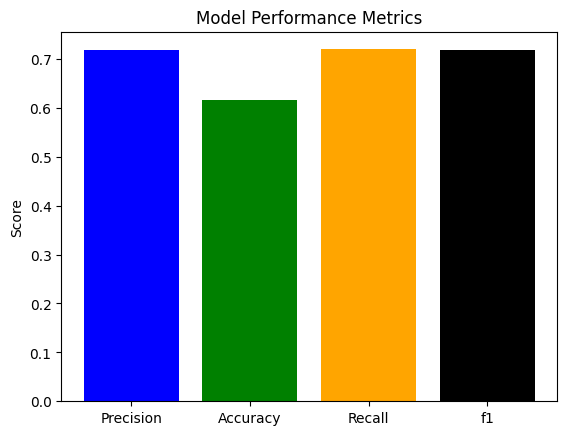

In [29]:
labels = ['Precision', 'Accuracy', 'Recall','f1']
values = [precision, accuracy, recall,f1_score]

plt.bar(labels, values, color=['blue', 'green', 'orange','black'])
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.show()

In [30]:

cross_val_scores = cross_val_score(model1, x_val, y, cv=10)
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [0.60634328 0.62562189 0.62873134 0.63410081 0.61792159 0.6316117
 0.62352209 0.63907903 0.59676416 0.63285625]
Mean cross-validation score: 0.6236552149024635


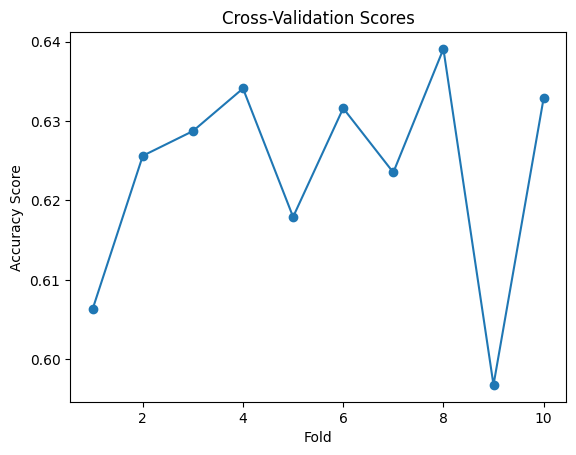

In [31]:
plt.plot(range(1, 11), cross_val_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores')
plt.show()

In [32]:
model3 = RandomForestClassifier()
model3.fit(X_train_vectorized, y_train)


RandomForestClassifier()

In [33]:
from sklearn.metrics import precision_score, recall_score
# Predictions on the test set
y_pred = model3.predict(X_test_vectorized)

# Evaluate the model
accuracy4 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(accuracy4)
print(conf_matrix)


0.6650077760497667
[[1157  167  145]
 [ 241  433  189]
 [ 168  167  548]]


In [34]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[1, 0] + conf_matrix[2, 0])
# Calculate recall
recall = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1] + conf_matrix[0, 2])
# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)
print("Accuracy:", accuracy)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

Accuracy: 0.6650077760497667
Precision: 0.7388250319284803
Recall: 0.7876106194690266
F1 Score: 0.7624382207578254


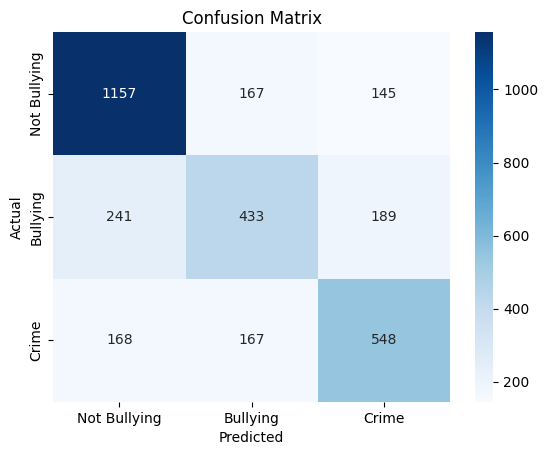

In [35]:
# Define your custom labels
labels = ['Not Bullying', 'Bullying', 'Crime']

# Generate your confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap with custom labels
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
cross_val_scores = cross_val_score(model3, x_val, y, cv=10)
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [0.664801   0.66604478 0.69029851 0.68761668 0.66272558 0.67952707
 0.67392657 0.67517113 0.65276914 0.68637212]
Mean cross-validation score: 0.673925255489819


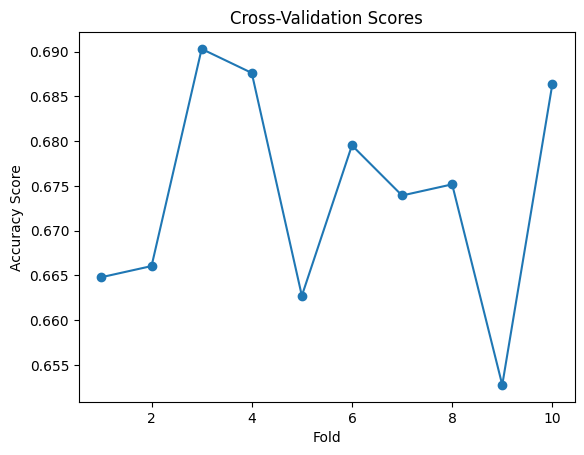

In [37]:
plt.plot(range(1, 11), cross_val_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores')
plt.show()

In [46]:
pip install xgboost


In [47]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Multi_labeled_toxic_comments_updated.csv")


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Multi_labeled_toxic_comments_updated.csv")

# Data Preprocessing
# Remove punctuation and convert to lowercase
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Encode the target variable
label_encoder = LabelEncoder()
df['annotation'] = label_encoder.fit_transform(df['annotation'])

# Split Data into features (X) and target variable (y)
X = df['text']
y = df['annotation']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shapes of train and test sets
print("X_train shape:", X_train_tfidf.shape)
print("X_test shape:", X_test_tfidf.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (12858, 18944)
X_test shape: (3215, 18944)
y_train shape: (12858,)
y_test shape: (3215,)


In [53]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Calculate the class imbalance ratio
imbalance_ratio = (y_train == 0).sum() / (y_train == 1).sum()

# Define XGBoost classifier with scale_pos_weight
xgb_classifier = xgb.XGBClassifier(scale_pos_weight=imbalance_ratio)

# Train the XGBoost classifier
xgb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(X_test_tfidf)

# Print classification report
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:48:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1469
           1       0.71      0.56      0.63       863
           2       0.75      0.69      0.72       883

    accuracy                           0.75      3215
   macro avg       0.74      0.72      0.73      3215
weighted avg       0.75      0.75      0.75      3215



In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Perform 10-fold cross-validation
cv_scores = cross_val_score(xgb_classifier, X_train_tfidf, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Predict on the test data
y_pred = xgb_classifier.predict(X_test_tfidf)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:56:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:57:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:58:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:59:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:00:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weigh

Cross-validation scores: [0.76360809 0.7651633  0.77138414 0.74727838 0.75583204 0.76205288
 0.76360809 0.74416796 0.76575875 0.7688716 ]
Mean cross-validation score: 0.7607725218001706
Cross-validation scores: [0.76360809 0.7651633  0.77138414 0.74727838 0.75583204 0.76205288
 0.76360809 0.74416796 0.76575875 0.7688716 ]
Mean cross-validation score: 0.7607725218001706
Accuracy: 0.7539657853810264
Precision: 0.7435928883218685
Recall: 0.7190216932589756
F1 score: 0.7264522034636679


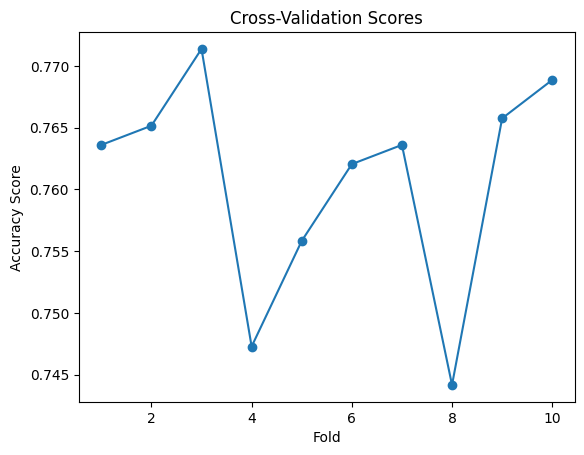

In [57]:
plt.plot(range(1, 11), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores')
plt.show()

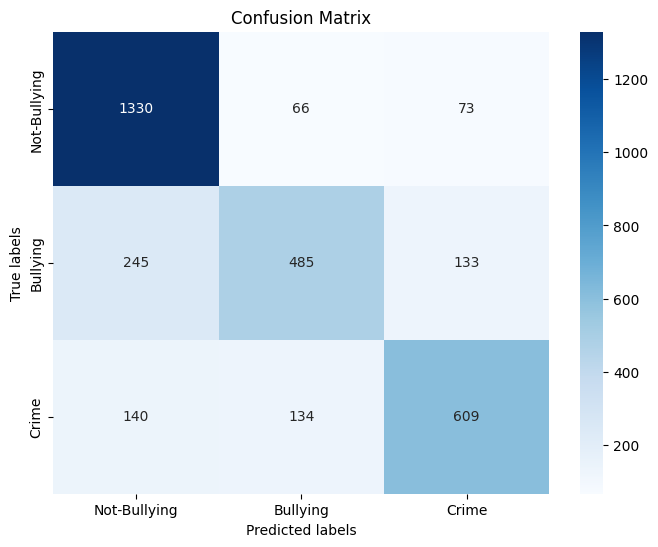

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not-Bullying', 'Bullying', 'Crime'], yticklabels=['Not-Bullying', 'Bullying', 'Crime'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


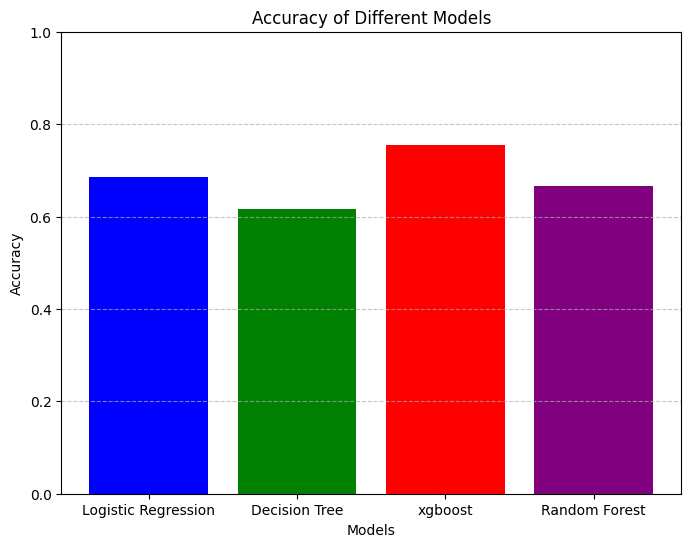

In [60]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracies = [accuracy1, accuracy2,accuracy,accuracy4]
models = ['Logistic Regression', 'Decision Tree', 'xgboost', 'Random Forest']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy scores
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
